# This notebook loads the sparsity (lifetime, population) metrics calculated for one cre-line and all structures, during response to natural scenes (sparsity_test_natural_scenes.ipynb) and static gratings (sparsity_test_static_gratings.ipynb).

# It then plots the data side-by-side for comparison.


In [17]:
import os
import platform
import pandas as pd
import numpy as np
import cPickle as cpickle
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info

# load the data
results_file='nat_scenes_sparsity.pkl'
f = open(results_file, "rb")
pop_sparsity_dict_ns = cpickle.load(f)
lifetime_sparsity_dict_ns = cpickle.load(f)
f.close()

# load the data
results_file='static_gratings_sparsity.pkl'
f = open(results_file, "rb")
pop_sparsity_dict_sg = cpickle.load(f)
lifetime_sparsity_dict_sg = cpickle.load(f)
f.close()



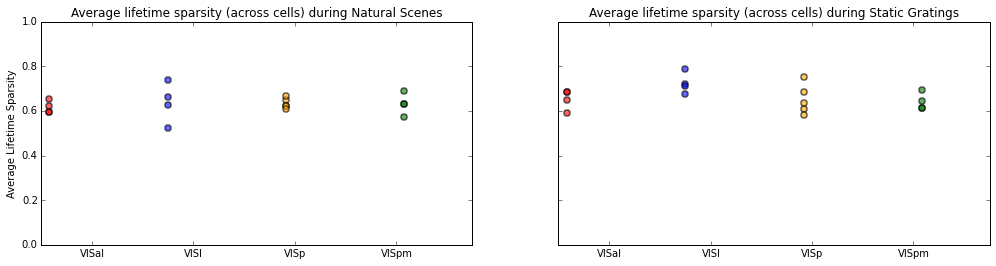

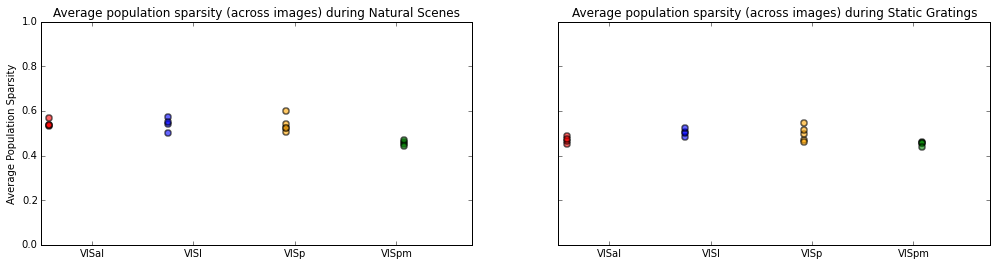

In [18]:
 # now plot lifetime sparsity
cre_lines = ['Rbp4-Cre_KL100']
structure_ids = ['VISal', 'VISl', 'VISp', 'VISpm']

fig, ax = plt.subplots(1,2,figsize=(17, 4))
ax = ax.ravel()
symbols = ['o', '^', 's', 'h', 'v', 'D'] #used to denote different cre_lines
colors = ['red', 'blue', 'orange', 'green'] #used for structures
for i, structure_name in enumerate(structure_ids):
    for j, cre_line in enumerate(cre_lines):
        container_ids = pop_sparsity_dict_ns[structure_name][cre_line].keys()
        for k, container_id in enumerate(container_ids):
            values = np.asarray(lifetime_sparsity_dict_ns[structure_name][cre_line][container_id])
            ax[0].plot((i * 7 + j) * np.ones(values.size), values, symbols[j], color=colors[i],
                    markerfacecolor=colors[i],
                    markeredgewidth=1.5, alpha=0.6)

ax[0].set_xticklabels(structure_ids)
ax[0].set_xticks([2.5, 8.5, 14.5, 20.5])
ax[0].set_xlim([-0.5, 25])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('Average Lifetime Sparsity')
ax[0].set_title('Average lifetime sparsity (across cells) during Natural Scenes')
#fig.savefig('meanpc_plot.eps')  # save the figure to file


for i, structure_name in enumerate(structure_ids):
    for j, cre_line in enumerate(cre_lines):
        container_ids = pop_sparsity_dict_ns[structure_name][cre_line].keys()
        for k, container_id in enumerate(container_ids):
            values = np.asarray(lifetime_sparsity_dict_sg[structure_name][cre_line][container_id])
            ax[1].plot((i * 7 + j) * np.ones(values.size), values, symbols[j], color=colors[i],
                    markerfacecolor=colors[i],
                    markeredgewidth=1.5, alpha=0.6)

ax[1].set_xticklabels(structure_ids)
ax[1].set_xticks([2.5, 8.5, 14.5, 20.5])
ax[1].set_yticklabels([])
ax[1].set_xlim([-0.5, 25])
ax[1].set_ylim([0, 1])
ax[1].set_title('Average lifetime sparsity (across cells) during Static Gratings')

# now plot population sparsity
fig, ax = plt.subplots(1,2,figsize=(17, 4))
ax = ax.ravel()
symbols = ['o', '^', 's', 'h', 'v', 'D'] #used to denote different cre_lines
colors = ['red', 'blue', 'orange', 'green'] #used for structures
for i, structure_name in enumerate(structure_ids):
    for j, cre_line in enumerate(cre_lines):
        container_ids = pop_sparsity_dict_ns[structure_name][cre_line].keys()
        for k, container_id in enumerate(container_ids):
            values = np.asarray(pop_sparsity_dict_ns[structure_name][cre_line][container_id])
            ax[0].plot((i * 7 + j) * np.ones(values.size), values, symbols[j], color=colors[i],
                    markerfacecolor=colors[i],
                    markeredgewidth=1.5, alpha=0.6)

ax[0].set_xticklabels(structure_ids)
ax[0].set_xticks([2.5, 8.5, 14.5, 20.5])
ax[0].set_xlim([-0.5, 25])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('Average Population Sparsity')
ax[0].set_title('Average population sparsity (across images) during Natural Scenes')
#fig.savefig('meanpc_plot.eps')  # save the figure to file


for i, structure_name in enumerate(structure_ids):
    for j, cre_line in enumerate(cre_lines):
        container_ids = pop_sparsity_dict_ns[structure_name][cre_line].keys()
        for k, container_id in enumerate(container_ids):
            values = np.asarray(pop_sparsity_dict_sg[structure_name][cre_line][container_id])
            ax[1].plot((i * 7 + j) * np.ones(values.size), values, symbols[j], color=colors[i],
                    markerfacecolor=colors[i],
                    markeredgewidth=1.5, alpha=0.6)

ax[1].set_xticklabels(structure_ids)
ax[1].set_xticks([2.5, 8.5, 14.5, 20.5])
ax[1].set_yticklabels([])
ax[1].set_xlim([-0.5, 25])
ax[1].set_ylim([0, 1])
ax[1].set_title('Average population sparsity (across images) during Static Gratings')

# I expected to see lower lifetime sparsity during static gratings, because we know that the response of V1 cells to orientation, sf, phase are gaussian tuning curves. But the data shows slightly higher sparsity during static gratings.

# Not sure what I expected to see with population sparsity.